In [12]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.ticker as ticker, statsmodels.formula.api as smf, statsmodels.api as sm
sns.set(style="whitegrid", font_scale=1.5)

data = pd.read_csv("vax.csv", parse_dates=["date"])
data["date"] = data["date"] - pd.Timedelta(days=1)
data["dayofyear"] = data["date"].dt.dayofyear
populations = [468333, 204010, 364938, 1527857, 2264264, 4430906, 5686481, 6979337, 21930273]

for i, juris in enumerate(data.columns[1:10]):
    data[f"{juris}_pc"] = data[juris] / populations[i]

for i in data.index:
    for juris in data.columns[1:10]:
        data.at[i, f"{juris}_new"] = (data.at[i, juris] - data.at[i - 1, juris]) if i > 0 else 0

data

,date,tas,nt,act,sa,wa,qld,vic,nsw,aus,...,aus_pc,tas_new,nt_new,act_new,sa_new,wa_new,qld_new,vic_new,nsw_new,aus_new
0,2021-03-22,1100.0,60.818834,101.819500,4.022478e+02,1.278087e+03,9.550859e+02,3369,2.320525e+03,5075,...,0.000231,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,2021-03-23,1100.0,75.127738,125.774669,4.968851e+02,1.578784e+03,1.179790e+03,4362,2.866477e+03,6269,...,0.000286,0.0,14.308904,23.955169,94.637224,300.696741,224.703955,993.0,545.952121,1194.0
2,2021-03-24,1100.0,125.388663,209.918705,8.293043e+02,2.635000e+03,1.969077e+03,5709,4.784168e+03,10463,...,0.000477,0.0,50.260924,84.144036,332.419195,1056.216190,789.286757,1347.0,1917.691118,4194.0
3,2021-03-25,2178.0,163.857324,274.320793,1.083731e+03,3.444000e+03,2.573180e+03,6797,6.251929e+03,13673,...,0.000623,1078.0,38.468662,64.402088,254.426709,809.000000,604.103598,1088.0,1467.760727,3210.0
4,2021-03-26,2178.0,185.824008,311.096191,1.229016e+03,4.025000e+03,2.918140e+03,7874,7.090062e+03,15506,...,0.000707,0.0,21.966684,36.775398,145.284784,581.000000,344.960092,1077.0,838.132527,1833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-12-25,426114.0,168469.000000,361202.000000,1.315232e+06,1.826920e+06,3.699073e+06,5249846,6.445555e+06,19678606,...,0.897326,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
279,2021-12-26,426785.0,168754.000000,361260.000000,1.316885e+06,1.831330e+06,3.709014e+06,5251499,6.446248e+06,19699622,...,0.898284,671.0,285.000000,58.000000,1653.000000,4410.000000,9941.000000,1653.0,693.000000,21016.0
280,2021-12-27,426862.0,168838.000000,361257.000000,1.317413e+06,1.833249e+06,3.710234e+06,5251886,6.446500e+06,19704056,...,0.898487,77.0,84.000000,-3.000000,528.000000,1919.000000,1220.000000,387.0,252.000000,4434.0
281,2021-12-28,426908.0,168860.000000,361309.000000,1.318026e+06,1.835446e+06,3.712143e+06,5252260,6.446732e+06,19709450,...,0.898733,46.0,22.000000,52.000000,613.000000,2197.000000,1909.000000,374.0,232.000000,5394.0


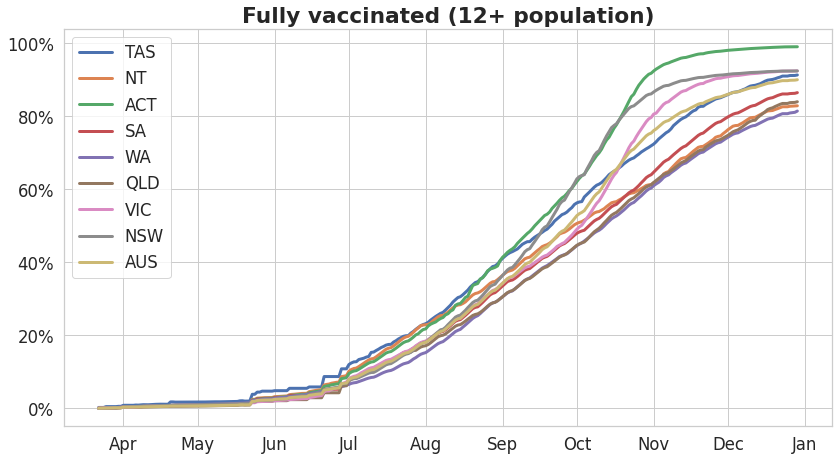

In [20]:
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

for juris in data.columns[1:10]:
    sns.lineplot(data=data, x="date", y=f"{juris}_pc", ax=ax, label=juris.upper(), lw=3)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Fully vaccinated (12+ population)", fontsize="large", fontweight="bold")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.savefig("vax_comparison.jpg")

data[["date"] + [x for x in data.columns if "_pc" in x]].to_csv("vax_comparison.csv", index=False)

,date,tas_pc,nt_pc,act_pc,sa_pc,wa_pc,qld_pc,vic_pc,nsw_pc,aus_pc
0,2021-03-22,0.002349,0.000298,0.000279,0.000263,0.000564,0.000216,0.000592,0.000332,0.000231
1,2021-03-23,0.002349,0.000368,0.000345,0.000325,0.000697,0.000266,0.000767,0.000411,0.000286
2,2021-03-24,0.002349,0.000615,0.000575,0.000543,0.001164,0.000444,0.001004,0.000685,0.000477
3,2021-03-25,0.004651,0.000803,0.000752,0.000709,0.001521,0.000581,0.001195,0.000896,0.000623
4,2021-03-26,0.004651,0.000911,0.000852,0.000804,0.001778,0.000659,0.001385,0.001016,0.000707
...,...,...,...,...,...,...,...,...,...,...
278,2021-12-25,0.909853,0.825788,0.989763,0.860834,0.806849,0.834834,0.923215,0.923520,0.897326
279,2021-12-26,0.911285,0.827185,0.989922,0.861916,0.808797,0.837078,0.923506,0.923619,0.898284
280,2021-12-27,0.911450,0.827597,0.989913,0.862262,0.809645,0.837353,0.923574,0.923655,0.898487
281,2021-12-28,0.911548,0.827705,0.990056,0.862663,0.810615,0.837784,0.923640,0.923688,0.898733


Intercept      -9.360799e-08
days            6.010684e-02
I(days ** 2)   -2.156019e-03
I(days ** 3)    3.263447e-05
I(days ** 4)   -2.287212e-07
I(days ** 5)    5.979566e-10
dtype: float64

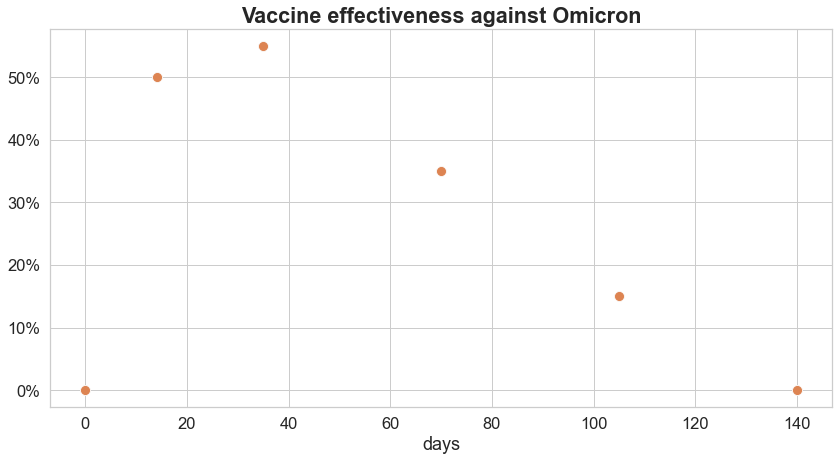

In [151]:
vax = pd.DataFrame(columns=["days", "effectiveness"], data={"days":[0, 14, 35, 70, 105, 140], "effectiveness":[0, .5, .55, .35, .15, 0]})

model = smf.ols(formula="effectiveness ~ days + I(days**2) + I(days**3) + I(days**4) + I(days**5)", data=vax).fit()

fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)
sns.scatterplot(data=vax, x="days", y="effectiveness", ax=ax, s=100)
sns.scatterplot(data=vax, x="days", y=model.predict(), ax=ax, s=100)
# plt.xlabel(None)
plt.ylabel(None)
plt.title("Vaccine effectiveness against Omicron", fontsize="large", fontweight="bold")
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %#d"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, 0))
model.params

In [152]:
for i in data.index:
    total = 0
    for day in range(140, 0, -1):        
        if i - day in data.index:
            cases = data.at[i - day, "act_new"]
            effectiveness = model.params[0] + model.params[1] * day + model.params[2] * pow(day, 2) + model.params[3] * pow(day, 3) + model.params[4] * pow(day, 4) + model.params[5] * pow(day, 5)            
            total = total + (effectiveness * cases)
    data.at[i, "effectiveness"] = total  / (432266 - 5593 - 5571 - 27121 - 29043)
data

,date,act,aus,dayofyear,aus_pc,act_pc,act_doses,act_new,effectiveness
0,2021-03-22,NaN,5.075000e+03,81,0.000231,0.000278,101.342670,0.000000,0.000000
1,2021-03-23,NaN,6.269000e+03,82,0.000286,0.000343,125.185655,23.842985,0.000000
2,2021-03-24,NaN,1.046300e+04,83,0.000477,0.000573,208.935637,83.749982,0.000004
3,2021-03-25,NaN,1.367300e+04,84,0.000623,0.000748,273.036124,64.100487,0.000021
4,2021-03-26,NaN,1.550600e+04,85,0.000707,0.000848,309.639299,36.603175,0.000046
...,...,...,...,...,...,...,...,...,...
276,2021-12-23,361202.000000,1.967861e+07,357,0.897326,0.989763,361202.000000,96.000000,0.184064
277,2021-12-24,361220.333333,1.968561e+07,358,0.897646,0.989813,361220.333333,18.333333,0.180429
278,2021-12-25,361238.666667,1.969262e+07,359,0.897965,0.989863,361238.666667,18.333333,0.176815
279,2021-12-26,361257.000000,1.969962e+07,360,0.898284,0.989913,361257.000000,18.333333,0.173242


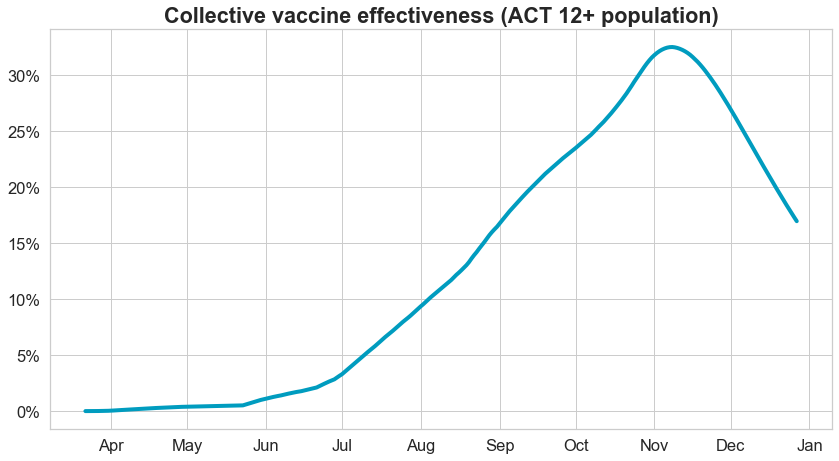

In [153]:
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.lineplot(data=data, x="date", y="effectiveness", ax=ax, lw=4, color="#009CBF")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Collective vaccine effectiveness (ACT 12+ population)", fontsize="large", fontweight="bold")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, 0))
plt.savefig("vax_effectiveness.jpg")